In [1]:
import torch
from torch import nn
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

import random

import numpy as np

import matplotlib.cm as cm

import pickle

import os, sys
parent_dir = os.path.abspath('.')
# the parent_dir could already be there if the kernel was not restarted,
# and we run this cell again
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    
from utils import functions

# parameters setup 
from global_vars import global_vars

%matplotlib notebook

import os

In [2]:
# restoring variables from memory (GT images, indices)
%store -r

In [3]:
# opening GT images 
with open('pickled_data/EVAL/un_noised_images_eval_beam_zoom.pkl', 'rb') as un_noised_images_eval_beam_zoom_pickled:
    un_noised_images = pickle.load(un_noised_images_eval_beam_zoom_pickled)
#with open('pickled_data/EVAL/noised_images_eval_27_06.pkl', 'rb') as noised_images_eval_27_06_pickled:
    #noised_images = pickle.load(noised_images_eval_27_06_pickled)
with open

In [4]:
# collecting CARE-predicted images into a tensor, ensuring appropriate omage loactions relative to GT images
import glob
import fnmatch
from tifffile import imread

#path at which the predicted images are stored 
path = 'tiffed_data_beam/predictions/CARE_zoom'

predicted_images = os.listdir(path)
predicted_images_len = len(predicted_images)

predicted_images_tensor = torch.zeros_like(un_noised_images)
for n in range(0,20):
    noised_imgs_n_list = glob.glob('tiffed_data_beam/predictions/CARE_zoom/{}_*_*.tif'.format(n))
    for m in range(0,20):
        noised_imgs_m_list = fnmatch.filter(noised_imgs_n_list, 'tiffed_data_beam/predictions/CARE_zoom/{}_{}_*.tif'.format(n, m))
        for i in range(0,50):
            img_i_path = fnmatch.filter(noised_imgs_m_list, 'tiffed_data_beam/predictions/CARE_zoom/{}_{}_{}.tif'.format(n,m,i))[0]
            #print(img_i_path)
            xy = torch.tensor(imread(img_i_path))
            predicted_images_tensor[n,m,i,:,:] = xy
            

In [5]:
# storing the predicted_images_tensor
predicted_images_tensor_beam_zoom_pickled = pickle.dump(predicted_images_tensor, open("pickled_data/EVAL/predicted_images_tensor_beam_zoom.pkl", 'wb'), protocol=4)
%store predicted_images_tensor_beam_zoom_pickled

Stored 'predicted_images_tensor_beam_zoom_pickled' (NoneType)


In [19]:
# CARE: -NRMSE-
# 4a. Computing NRMSE for each GT-CARE_prediction image pair in the data collection
# dims=[m, n, reps]
metric_output = functions.NRMSE_compute(un_noised_images, predicted_images_tensor)

# 5. Computing statistics for the metric across all n x m sets 
# dims=[m, n, 2]
metric_stats_NRMSE_CARE_beam_zoom = functions.set_mean_std_compute(metric_output)

In [20]:
# CARE: -RMSE-
# 4b. Computing RMSE for each image in the data collection
# dims=[m, n, reps]
metric_output = functions.RMSE_compute(un_noised_images, predicted_images_tensor)

#tests 
print(metric_output.shape)

# 5. Computing statistics for the metric across all n x m sets 
# dims=[m, n, 2]
metric_stats_RMSE_CARE_beam_zoom = functions.set_mean_std_compute(metric_output)
#tests

torch.Size([20, 20, 50])


In [21]:
# CARE: -PSNR- 
# 4c. Computing PSNR for each image in the data collection
# dims=[m, n, reps]
metric_output = functions.PSNR_compute(un_noised_images, predicted_images_tensor)

#tests 
print(metric_output.shape)

# 5. Computing statistics for the metric across all n x m sets 
# dims=[m, n, 2]
metric_stats_PSNR_CARE_beam_zoom = functions.set_mean_std_compute(metric_output)
#tests

torch.Size([20, 20, 50])


In [22]:
# CARE: -SSIM- 
# 4c. Computing SSIM for each image in the data collection
# dims=[m, n, reps]
metric_output = functions.SSIM_compute(un_noised_images, predicted_images_tensor)
#tests 
print(metric_output.shape)

# 5. Computing statistics for the metric across all n x m sets 
# dims=[m, n, 2]
metric_stats_SSIM_CARE_beam_zoom= functions.set_mean_std_compute(metric_output)
#tests

torch.Size([20, 20, 50])


In [26]:
# CARE: -MS_SSIM-
# 4c. Computing MS_SSIM for each image in the data collection
# dims=[m, n, reps]
metric_output = functions.MS_SSIM_compute(un_noised_images, predicted_images_tensor)
#tests 
print(metric_output.shape)

# 5. Computing statistics for the metric across all n x m sets 
# dims=[m, n, 2]
metric_stats_MS_SSIM_CARE_beam_zoom = functions.set_mean_std_compute(metric_output)

torch.Size([20, 20, 50])


In [27]:
%store metric_stats_NRMSE_CARE_beam_zoom
%store metric_stats_RMSE_CARE_beam_zoom
%store metric_stats_PSNR_CARE_beam_zoom
%store metric_stats_SSIM_CARE_beam_zoom
%store metric_stats_MS_SSIM_CARE_beam_zoom

Stored 'metric_stats_NRMSE_CARE_beam_zoom' (Tensor)
Stored 'metric_stats_RMSE_CARE_beam_zoom' (Tensor)
Stored 'metric_stats_PSNR_CARE_beam_zoom' (Tensor)
Stored 'metric_stats_SSIM_CARE_beam_zoom' (Tensor)
Stored 'metric_stats_MS_SSIM_CARE_beam_zoom' (Tensor)


<IPython.core.display.Javascript object>


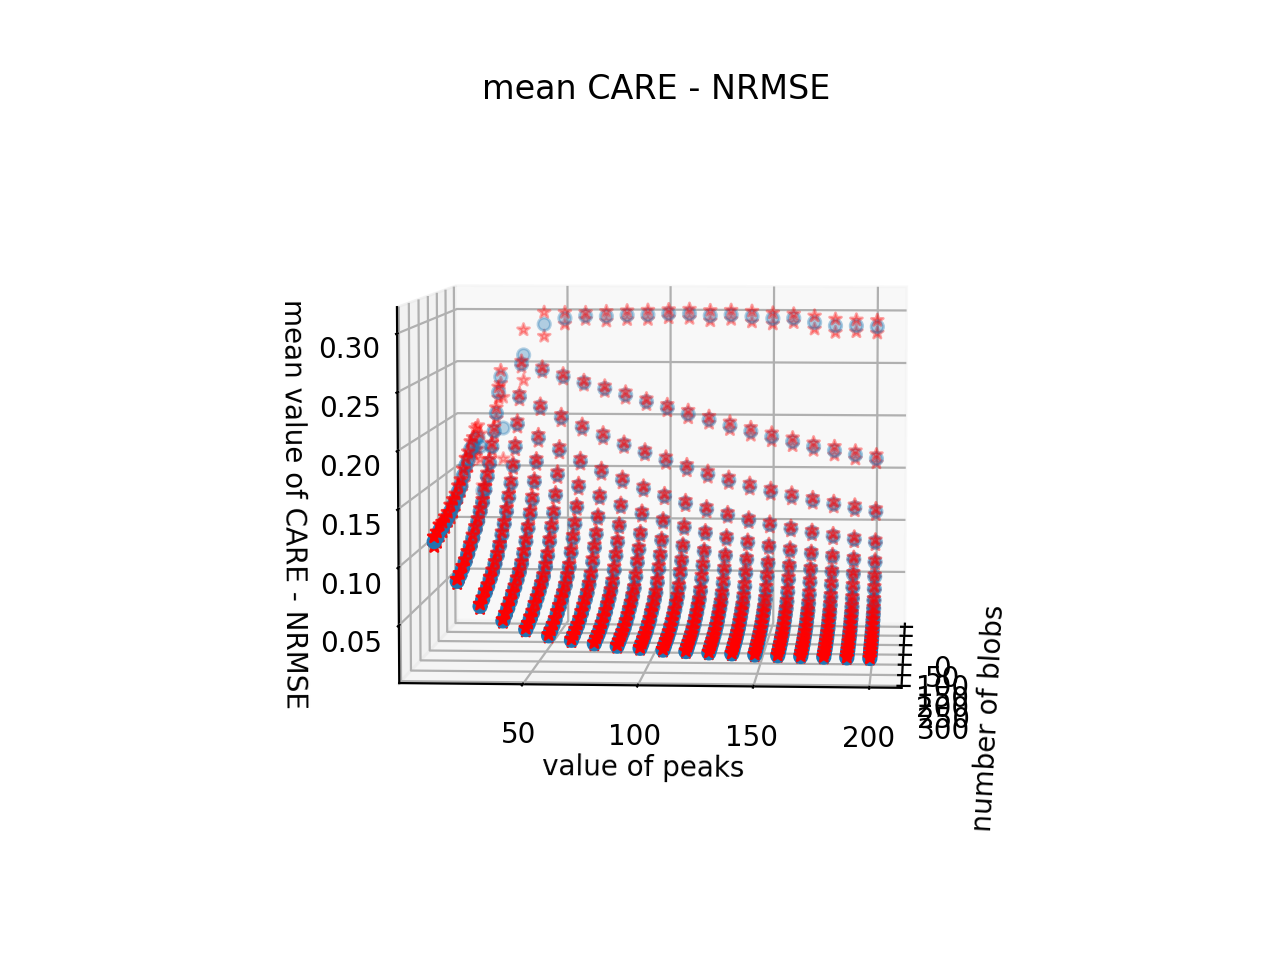

<IPython.core.display.Javascript object>


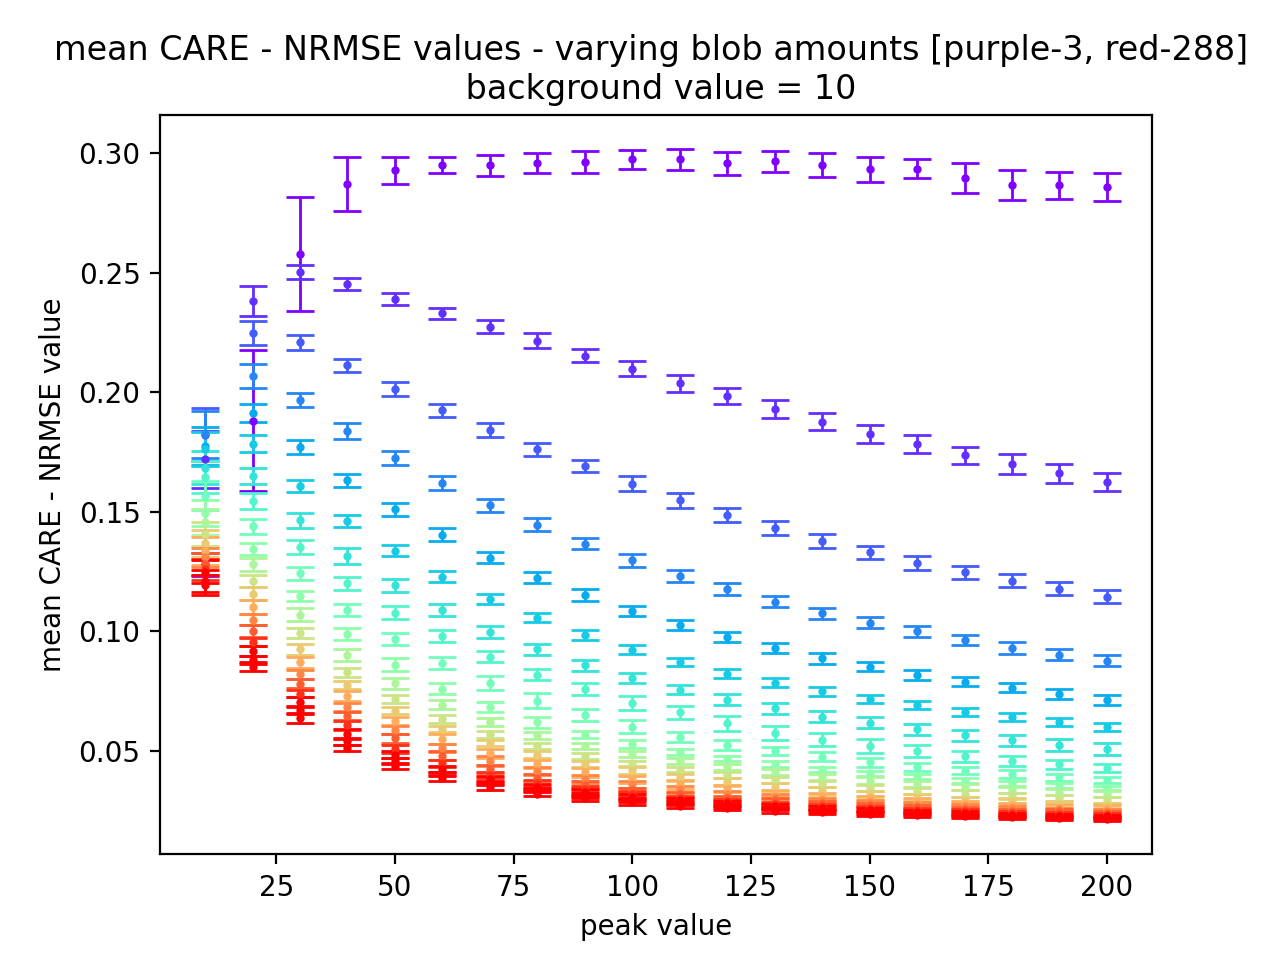

<IPython.core.display.Javascript object>


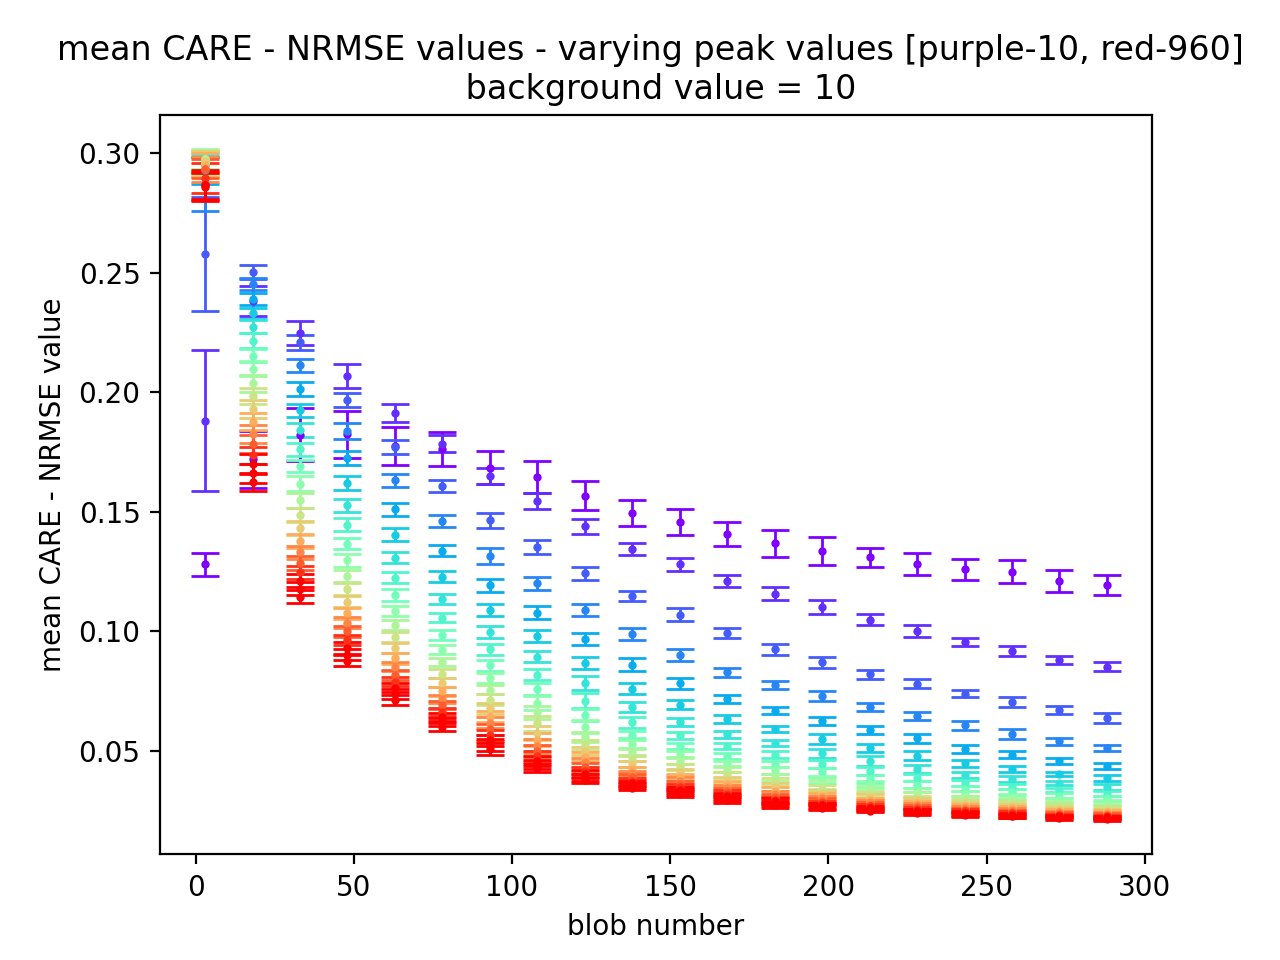

In [28]:
# CARE: -NRMSE-
# 6. plotting obtained stats
functions.plot_stats(metric_stats_NRMSE_CARE_beam_zoom, indices_eval_zoom, 'CARE - NRMSE')

<IPython.core.display.Javascript object>


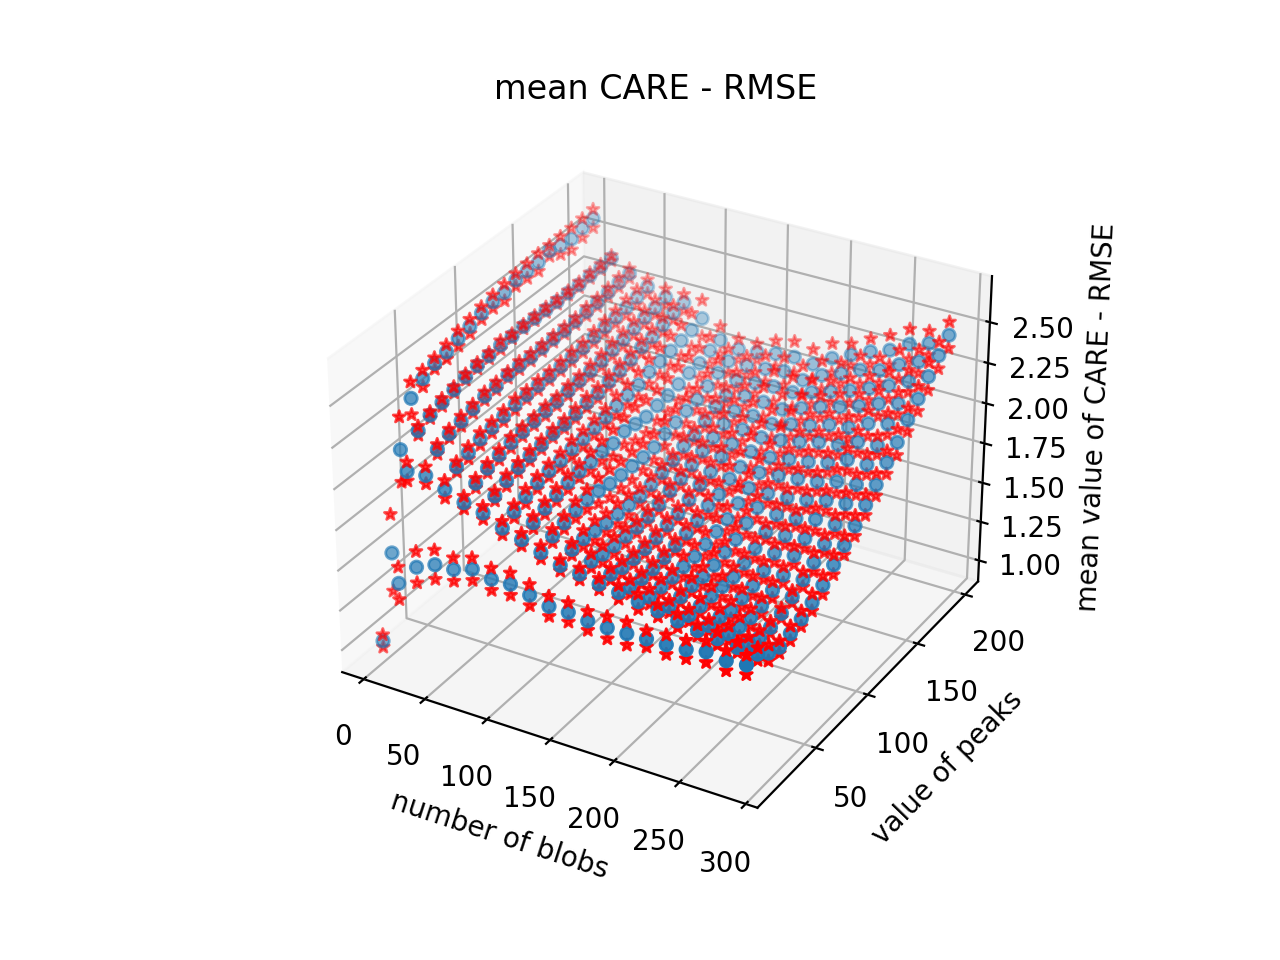

<IPython.core.display.Javascript object>


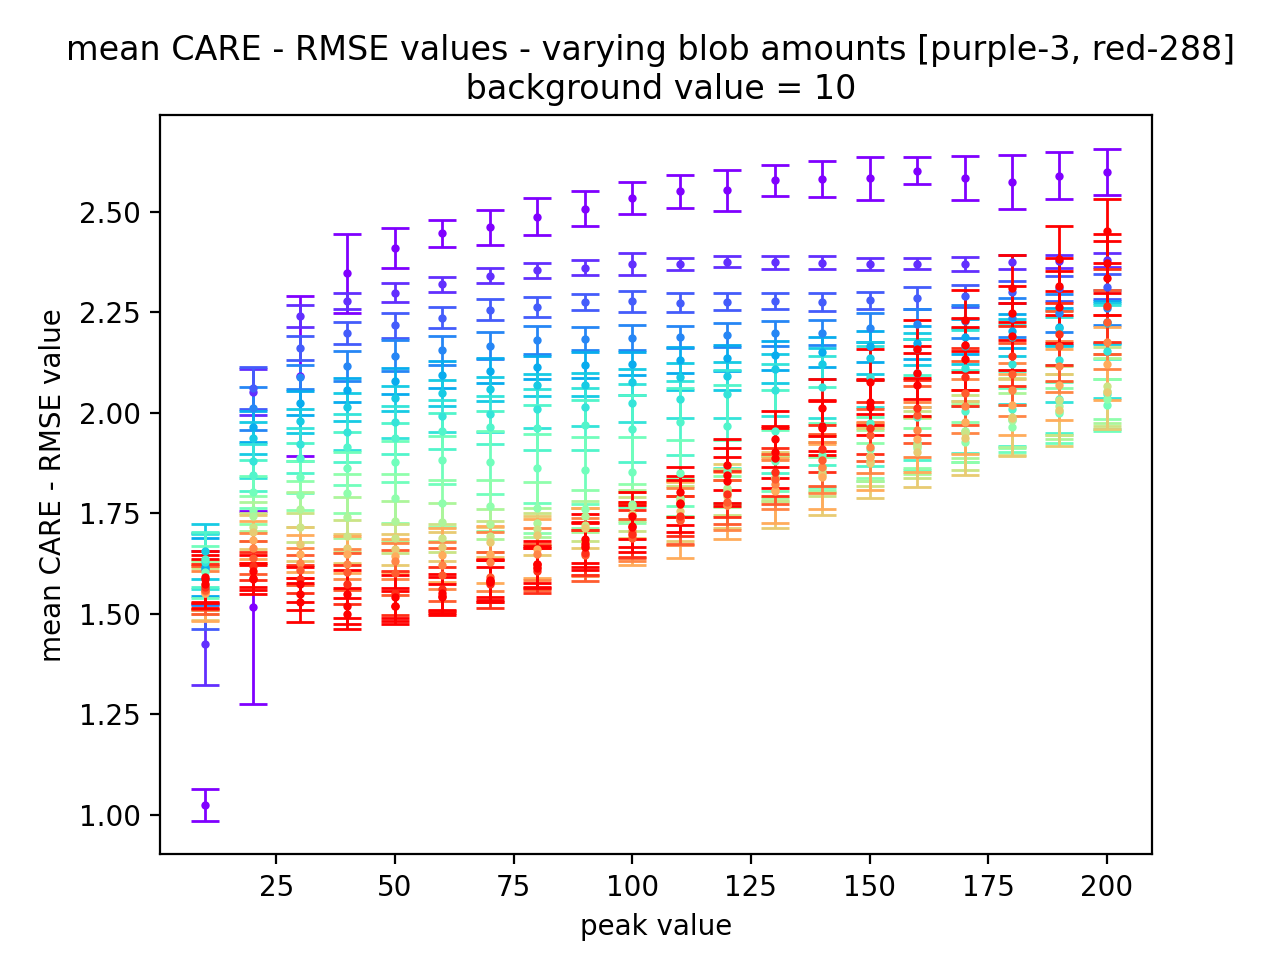

<IPython.core.display.Javascript object>


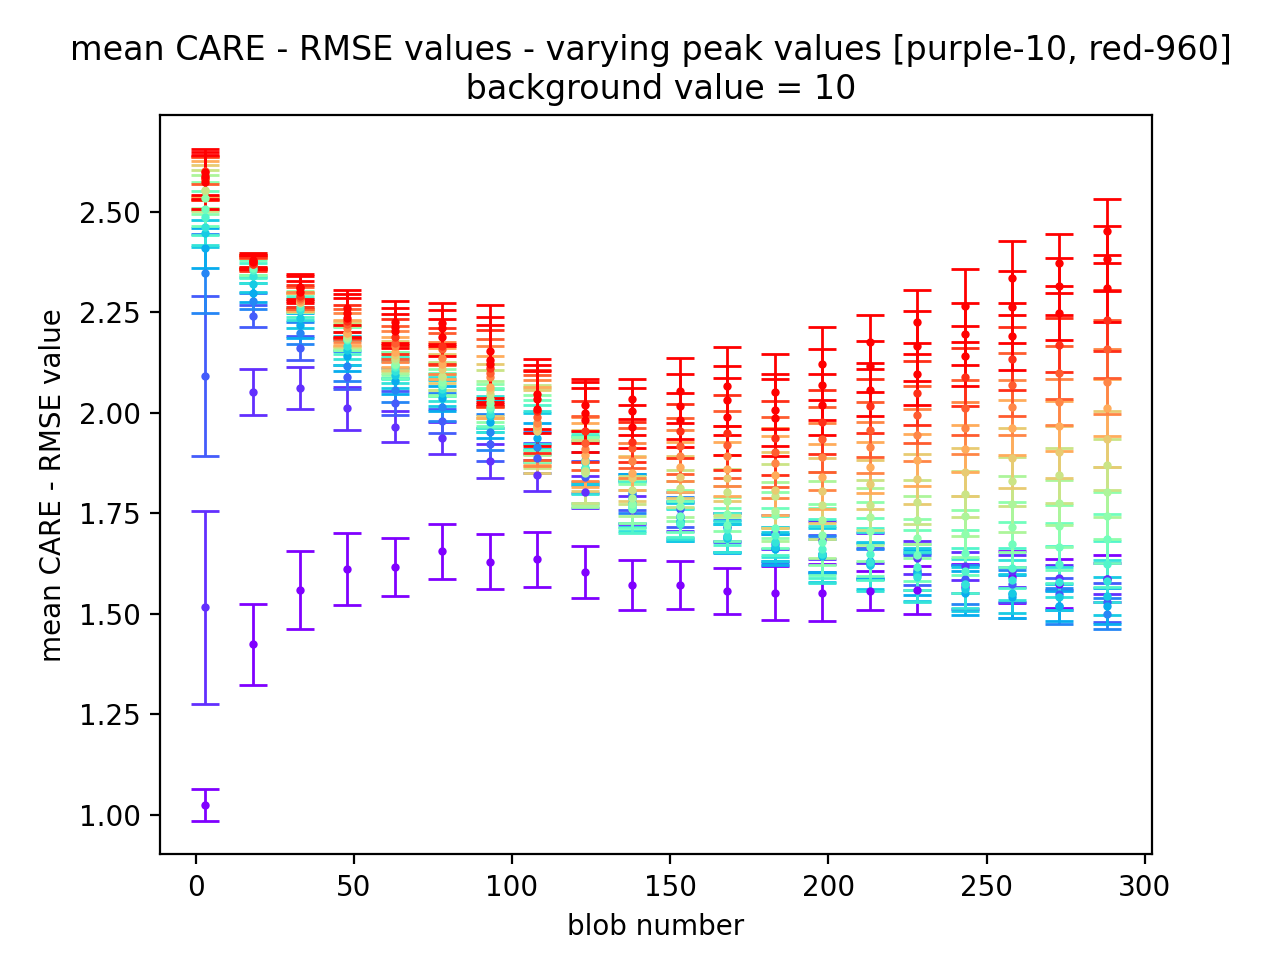

In [29]:
# CARE: -RMSE-
# 6. plotting obtained stats
functions.plot_stats(metric_stats_RMSE_CARE_beam_zoom, indices_eval_zoom, 'CARE - RMSE')

<IPython.core.display.Javascript object>


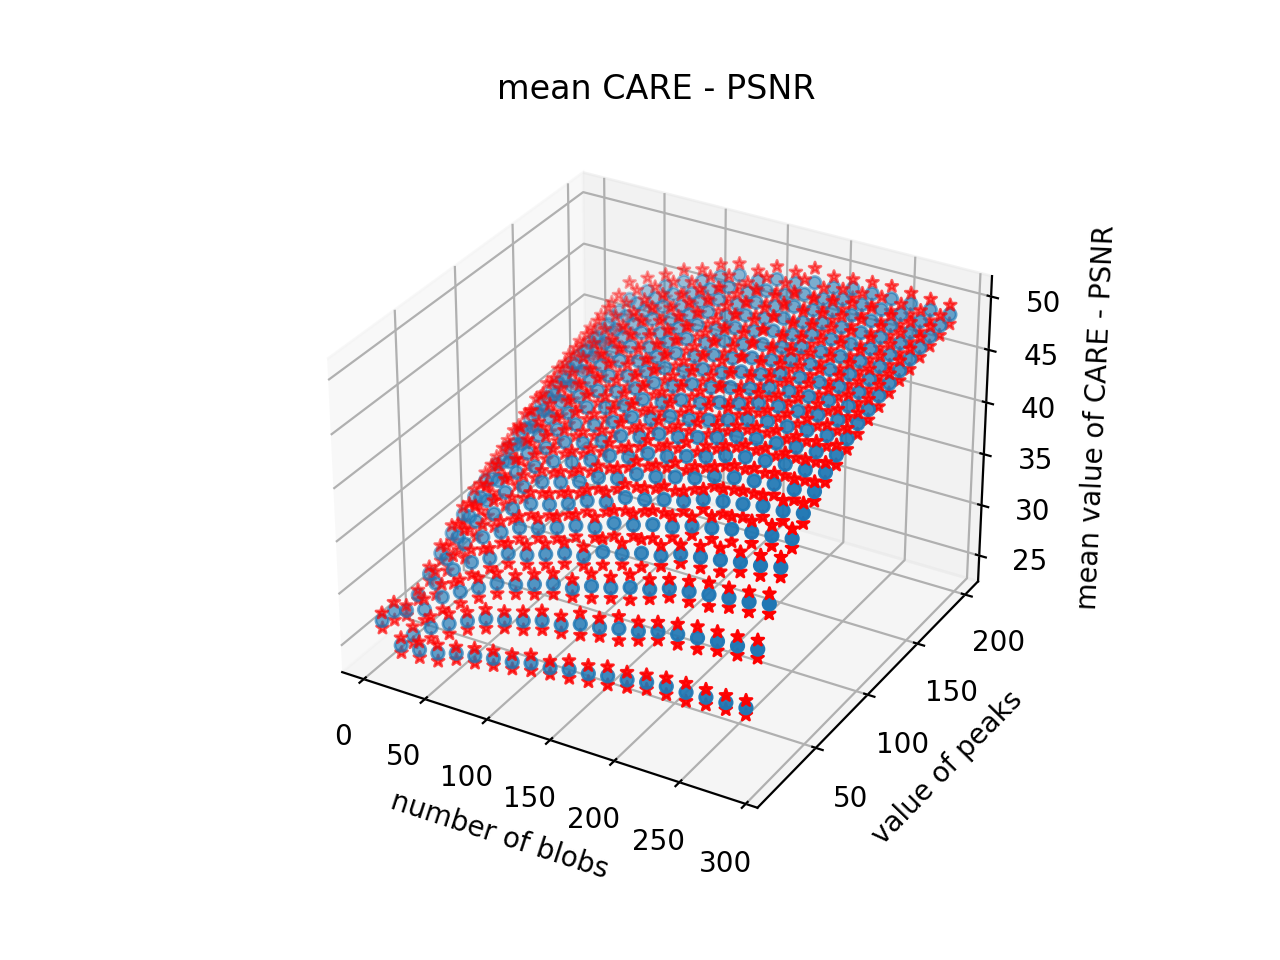

<IPython.core.display.Javascript object>


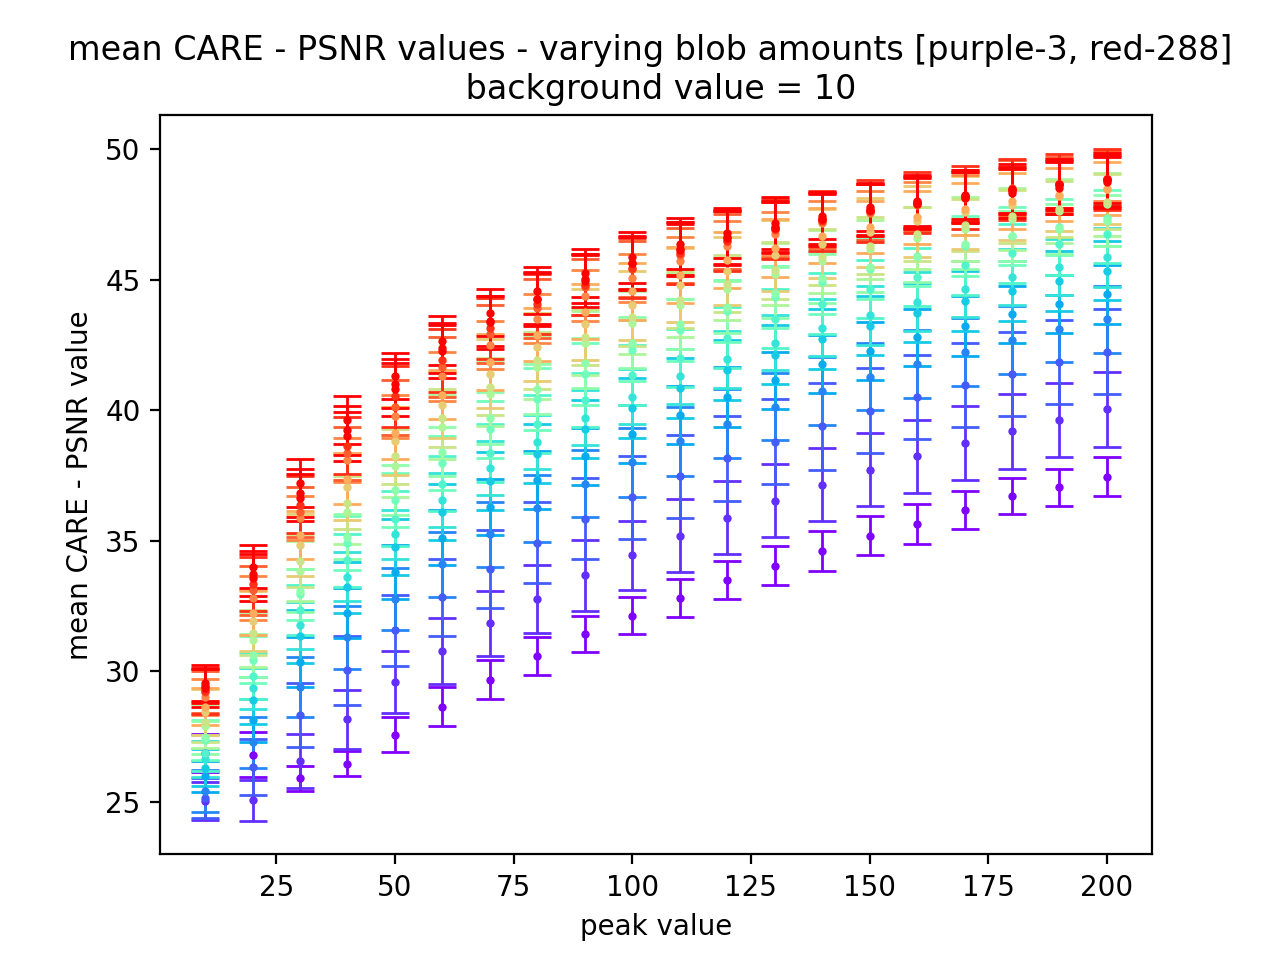

<IPython.core.display.Javascript object>


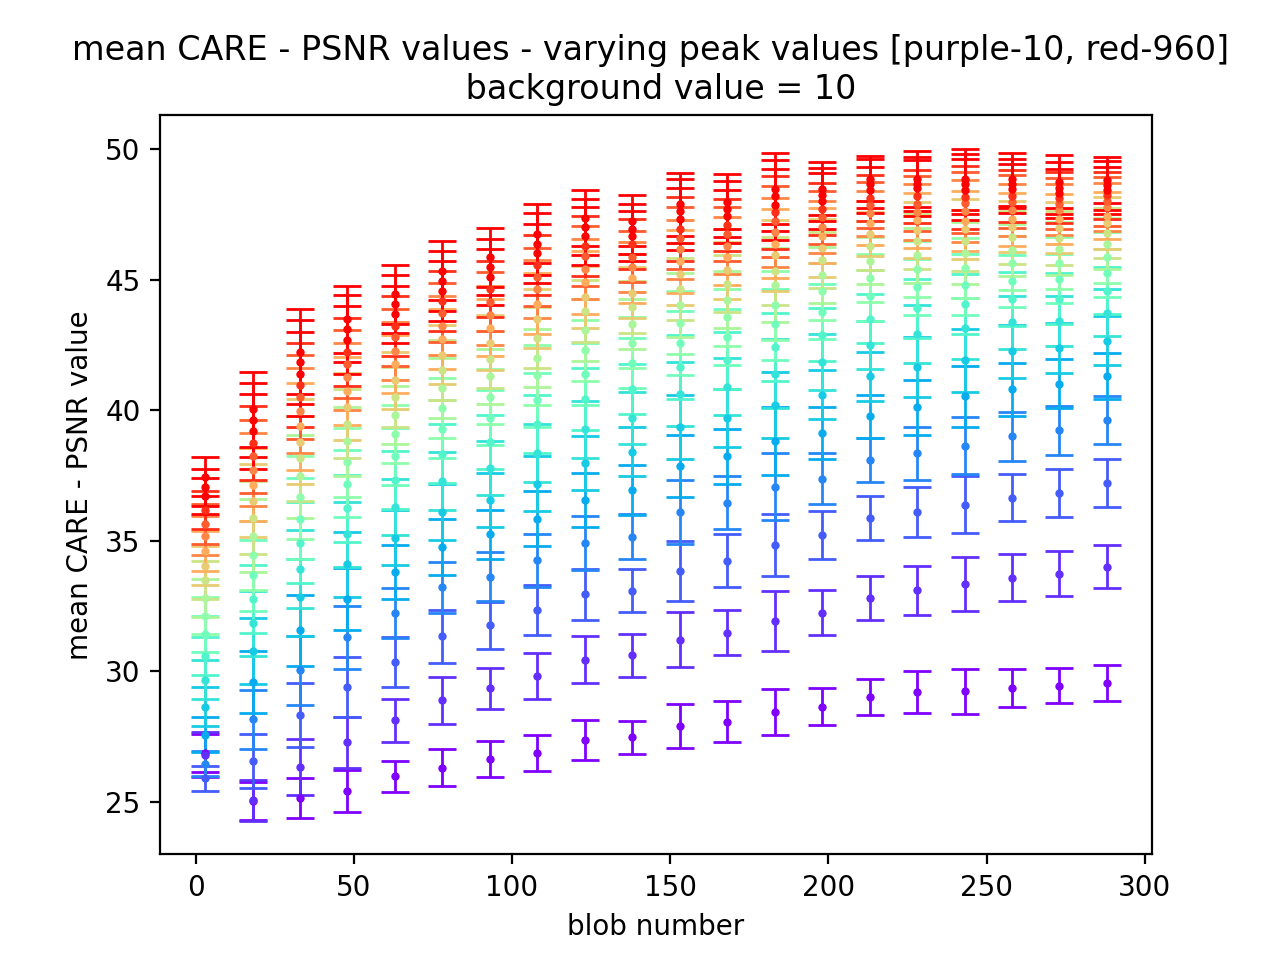

In [30]:
# CARE: -PSNR-
# 6. plotting obtained stats
functions.plot_stats(metric_stats_PSNR_CARE_beam_zoom, indices_eval_zoom, 'CARE - PSNR')

<IPython.core.display.Javascript object>


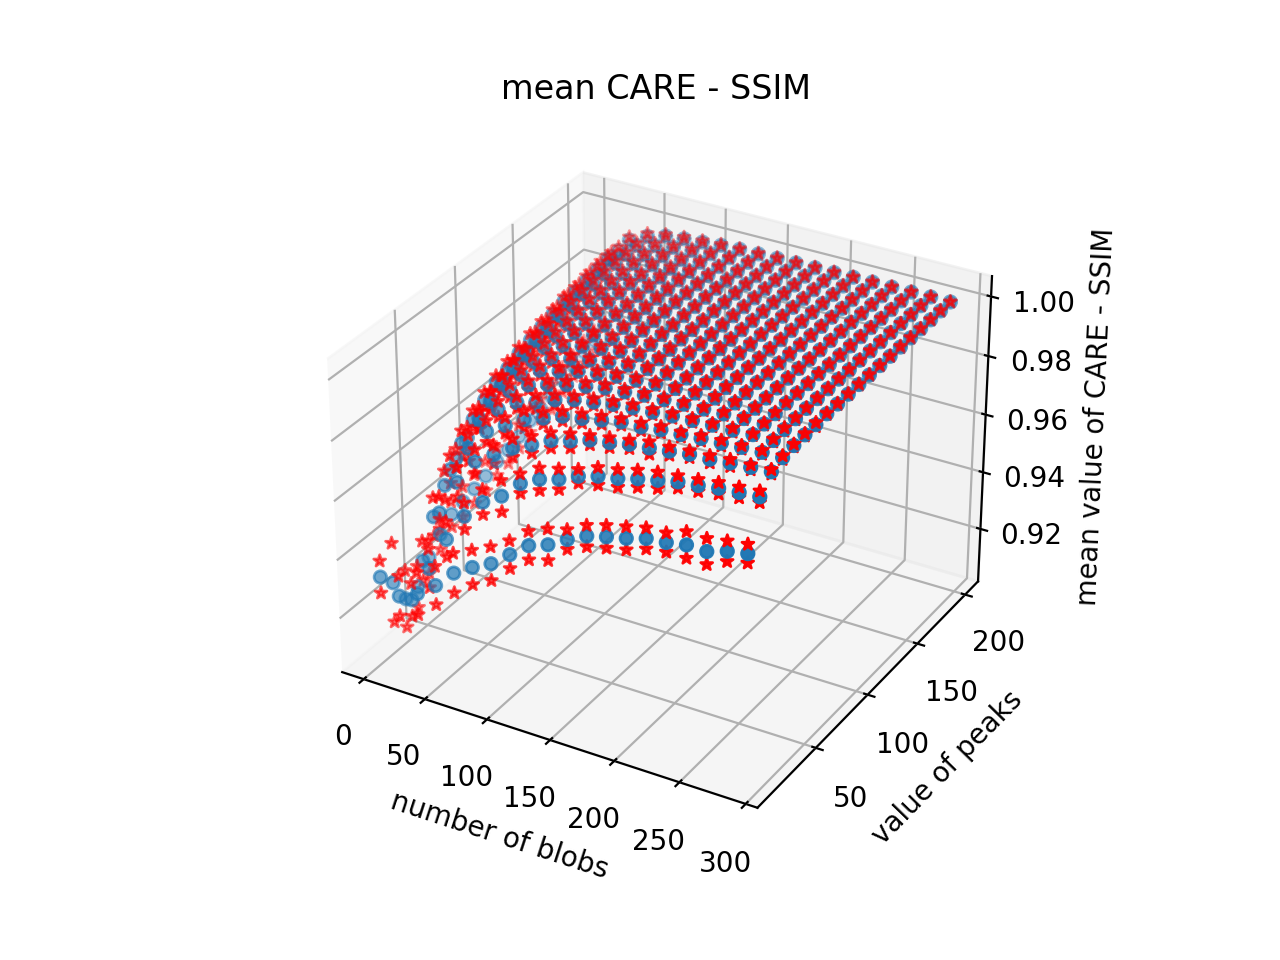

<IPython.core.display.Javascript object>


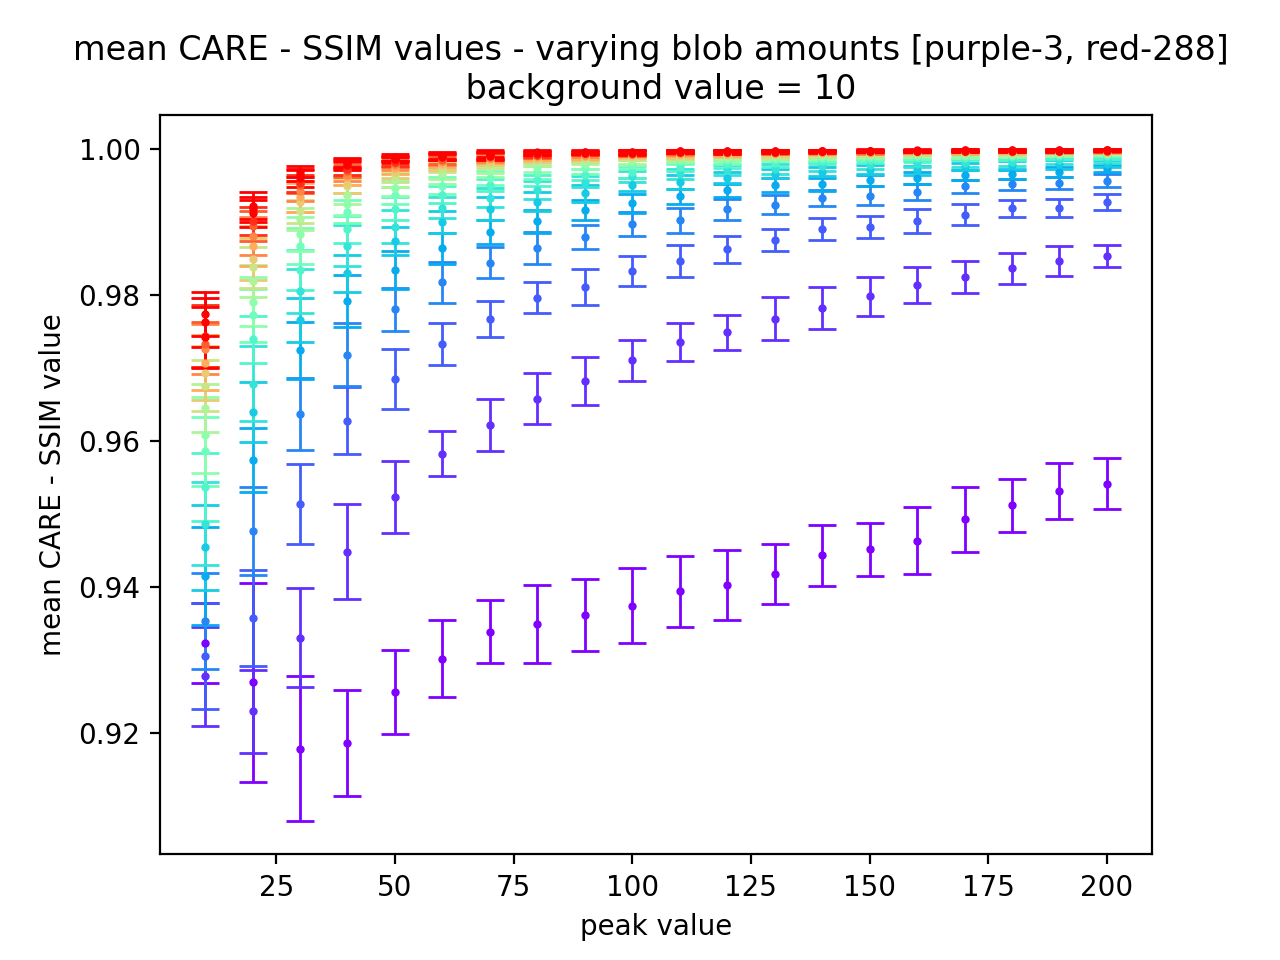

<IPython.core.display.Javascript object>


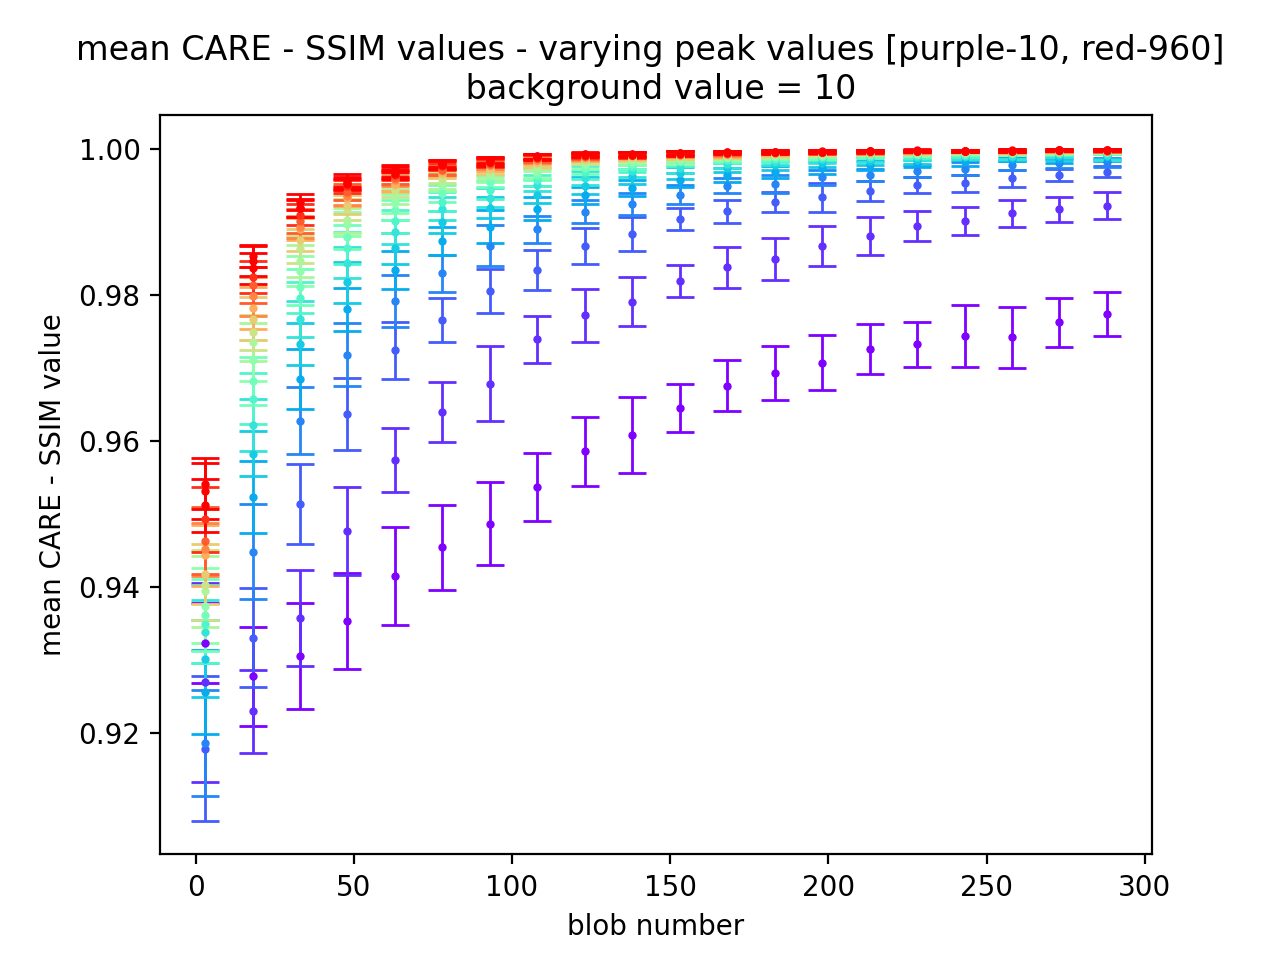

In [31]:
# CARE: -SSIM-
# 6. plotting obtained stats
functions.plot_stats(metric_stats_SSIM_CARE_beam_zoom, indices_eval_zoom, 'CARE - SSIM')

<IPython.core.display.Javascript object>


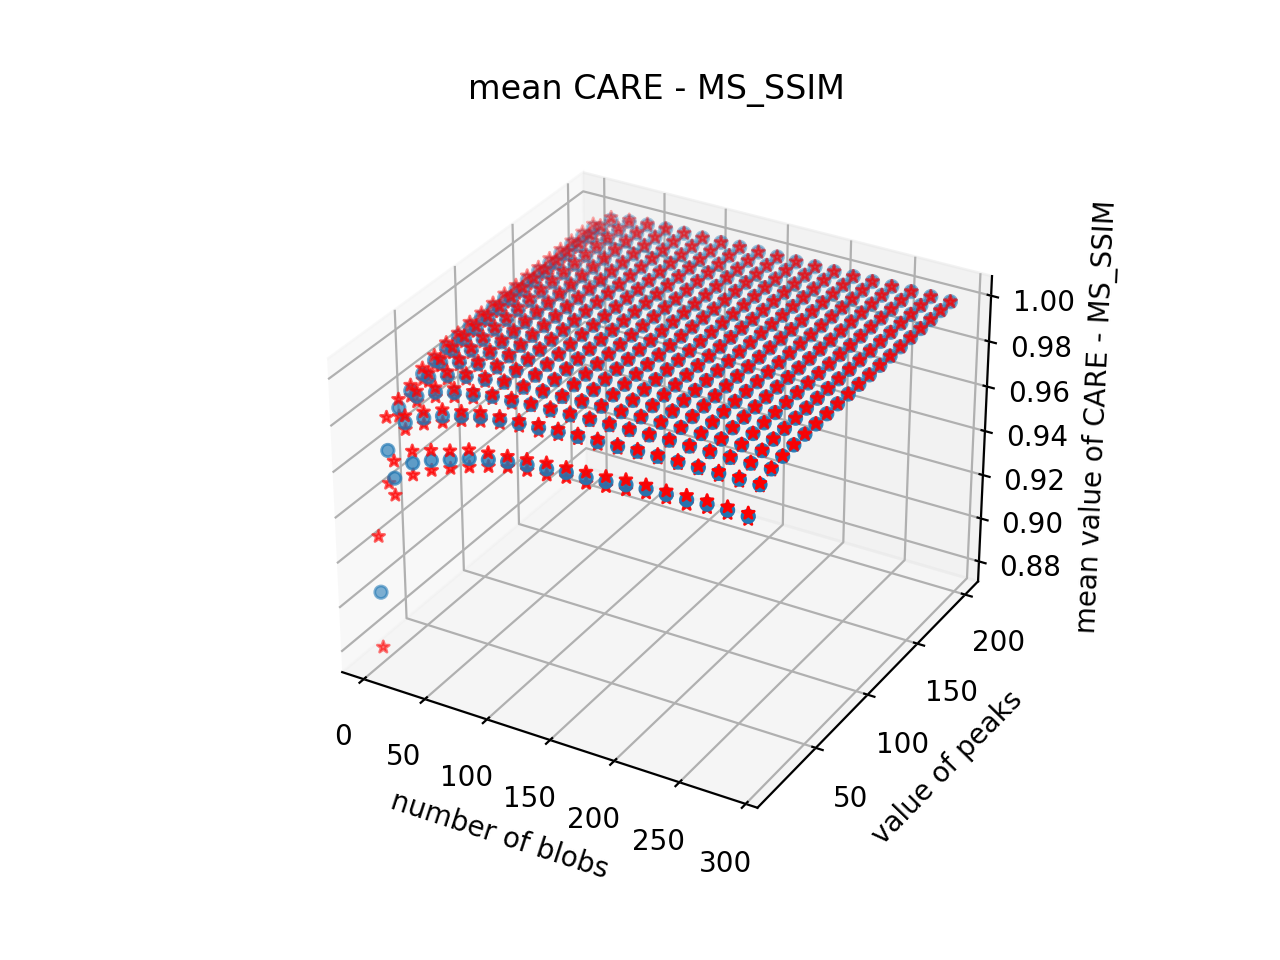

<IPython.core.display.Javascript object>


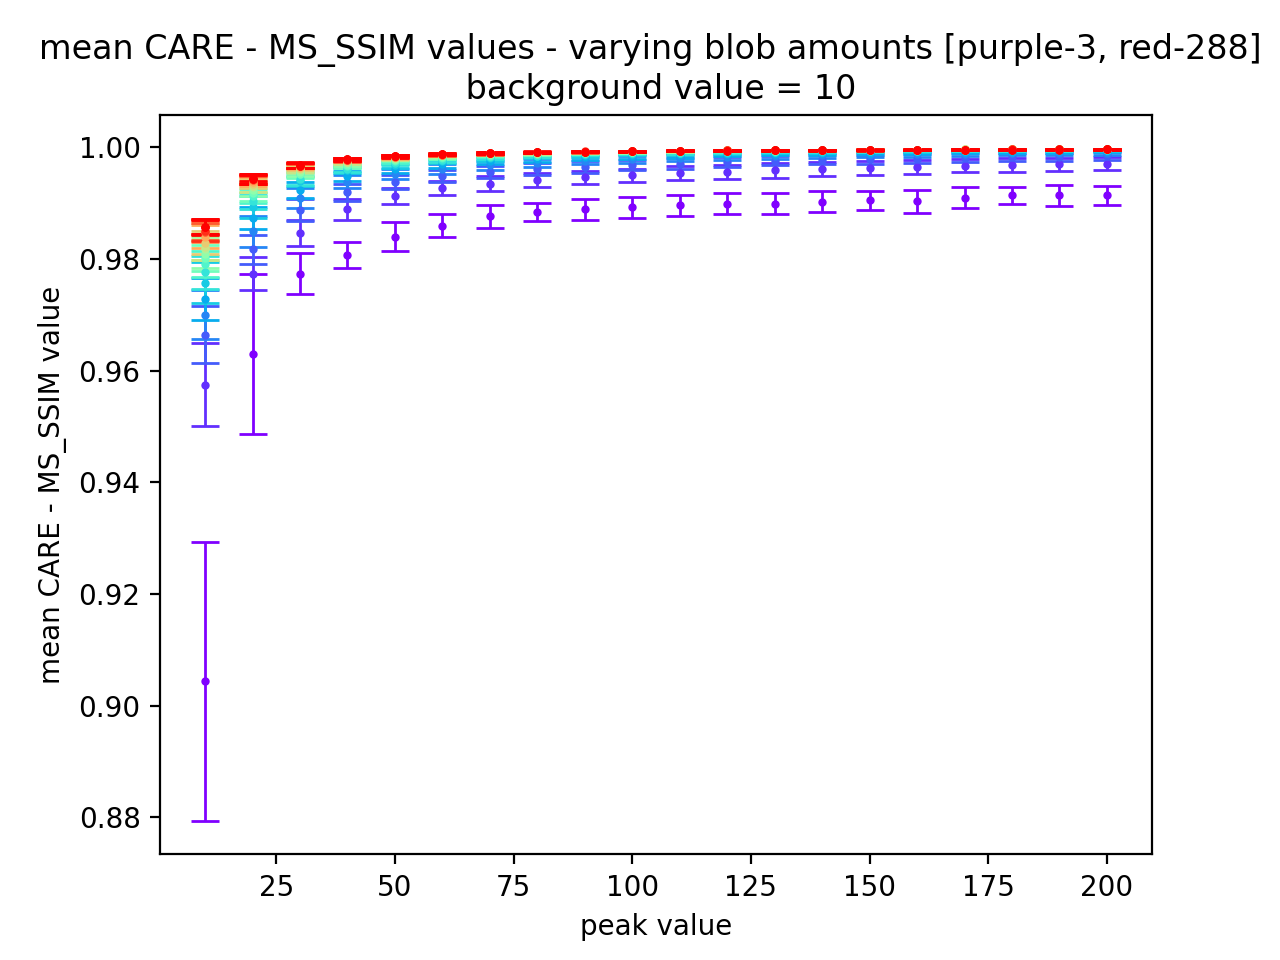

<IPython.core.display.Javascript object>


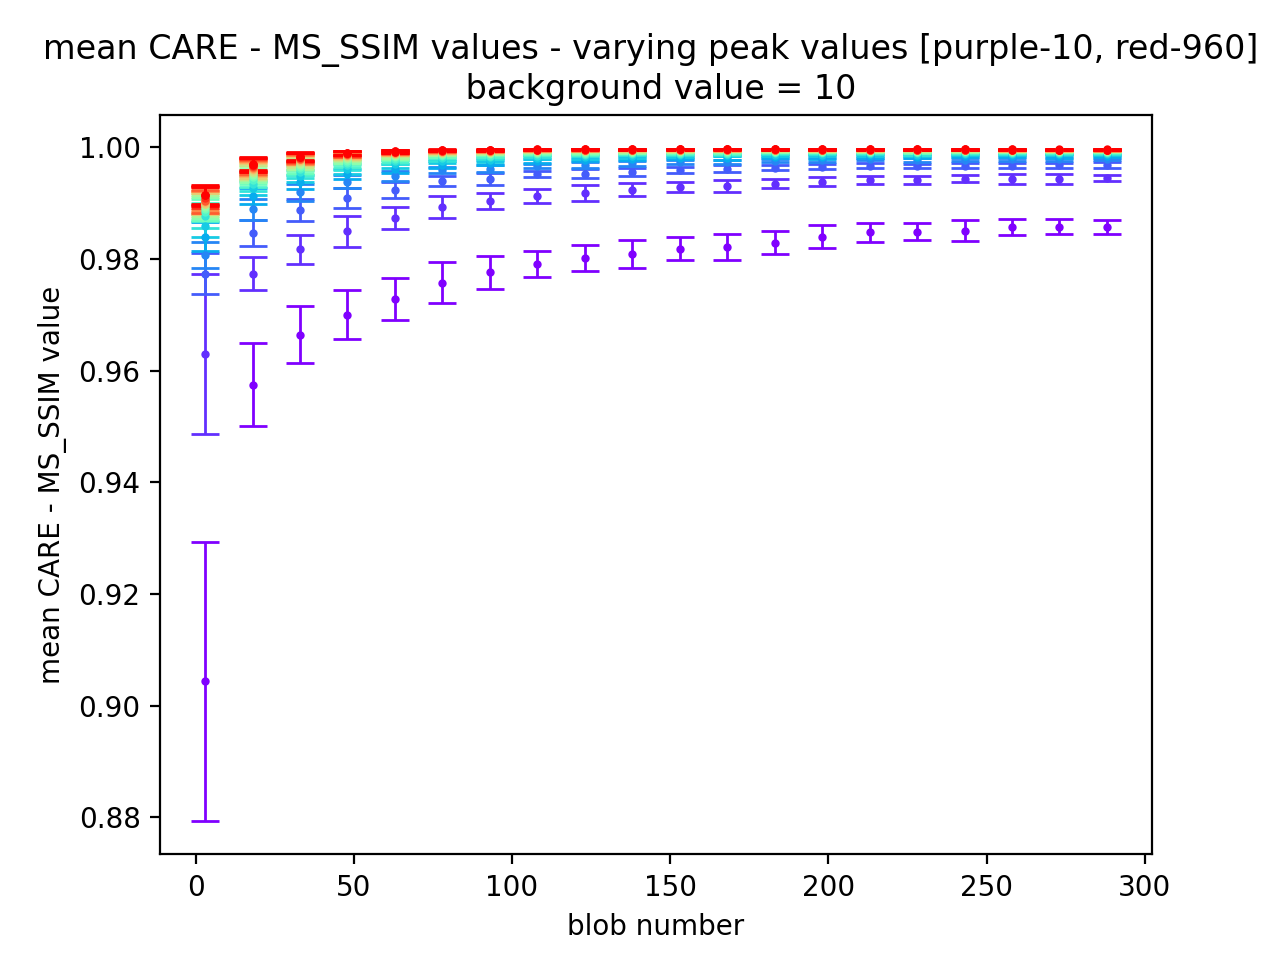

In [32]:
# CARE: -MS_SSIM-
# 6. plotting obtained stats
functions.plot_stats(metric_stats_MS_SSIM_CARE_beam_zoom, indices_eval_zoom, 'CARE - MS_SSIM')